# **Scaling and Standardization in Machine Learning**

---

## **Introduction**

In machine learning, scaling and standardization are crucial preprocessing steps that help improve the performance and stability of models. These techniques are used to adjust the range and distribution of numerical features, ensuring that no feature dominates the model due to its scale or units. This document will delve deeply into the concepts of scaling and standardization, highlighting their differences, benefits, and practical applications using real datasets.

---

## **1. Understanding Scaling**

### **Definition**
Scaling transforms features so that their values fall within a specific range, typically [0, 1] or [-1, 1]. This method adjusts the scale of data without altering its distribution.

### **Formula**
The formula for Min-Max Scaling is:

X_scaled = (X - X_min) / (X_max - X_min)


### **When to Use Scaling?**
- When features have different units or scales (e.g., age in years vs. income in dollars).
- When using machine learning algorithms sensitive to the magnitude of data, such as:
  - K-Nearest Neighbors (KNN)
  - Support Vector Machines (SVM)
  - K-Means Clustering

### **Key Advantages**
- Ensures all features contribute equally.
- Improves the performance of distance-based models.

---

## **2. Understanding Standardization**

### **Definition**
Standardization transforms data to have a mean of 0 and a standard deviation of 1. It normalizes the distribution of features and reduces the influence of outliers.

### **Formula**
The formula for Standardization is:

X_standardized = (X - μ) / σ

where:
- μ is the mean of the feature.
- σ is the standard deviation of the feature.


### **When to Use Standardization?**
- When features have different distributions.
- When using algorithms that assume normally distributed data, such as:
  - Logistic Regression
  - Principal Component Analysis (PCA)
  - Linear Regression

### **Key Advantages**
- Centers data around 0, making it easier to interpret.
- Reduces the influence of outliers compared to scaling.

---

## **3. Key Differences Between Scaling and Standardization**

| Aspect                     | Scaling (Min-Max)                 | Standardization                     |
|----------------------------|------------------------------------|-------------------------------------|
| **Definition**             | Transforms data to a fixed range. | Centers data to have mean = 0 and standard deviation = 1. |
| **Formula**                | \( \frac{X - X_{min}}{X_{max} - X_{min}} \) | \( \frac{X - \mu}{\sigma} \) |
| **Range of Values**        | Typically [0, 1] or [-1, 1].      | Unbounded.                         |
| **Sensitivity to Outliers**| Sensitive to outliers.            | Less sensitive to outliers.         |
| **Use Case**               | Distance-based algorithms.         | Algorithms assuming normal distribution. |
| **Effect on Distribution** | Does not normalize distribution.   | Normalizes the distribution.        |

---

## **4. Illustrative Example with Simple Data**

### **Original Dataset**
Consider the following simple dataset:

| Feature A | Feature B |
|-----------|-----------|
| 10        | 100       |
| 20        | 200       |
| 30        | 300       |
| 40        | 400       |

### **After Min-Max Scaling** (Range [0, 1])

| Feature A | Feature B |
|-----------|-----------|
| 0.0       | 0.0       |
| 0.33      | 0.33      |
| 0.67      | 0.67      |
| 1.0       | 1.0       |

### **After Standardization** (Mean = 0, Std = 1)

| Feature A | Feature B |
|-----------|-----------|
| -1.34     | -1.34     |
| -0.45     | -0.45     |
|  0.45     |  0.45     |
|  1.34     |  1.34     |

---




## **Scaling the Iris Dataset**
**Why Scaling?**
The Iris dataset has features like sepal length, sepal width, petal length, and petal width, all measured in centimeters but with different ranges. Scaling ensures that all features contribute equally to the model.

**How?**
We’ll use Min-Max Scaling to transform the data into a range of [0, 1].

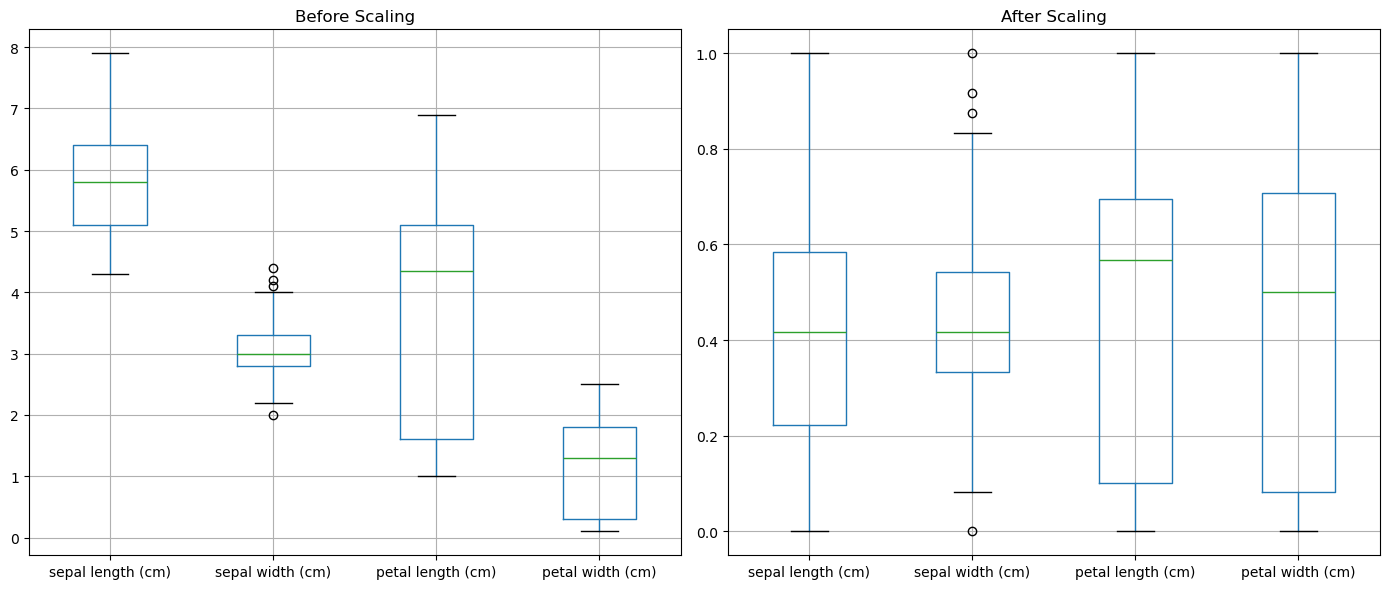

In [24]:
#!pip install sklearn
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Create a figure with two subplots (side by side for better comparison)
plt.figure(figsize=(14, 6))

# Before Scaling
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
df.boxplot()
plt.title('Before Scaling')

# Apply Min-Max Scaling
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_data, columns=iris.feature_names)

# After Scaling
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
scaled_df.boxplot()
plt.title('After Scaling')

# Show the plots
plt.tight_layout()
plt.show()


`means and variances`


## **Scaling the California Housing Dataset**
**Why Scaling?**
The California Housing dataset contains features like MedInc (median income) and AveRooms (average rooms), which have different ranges. Scaling ensures that these features contribute equally to the model.

**How?**
We’ll use Min-Max Scaling to transform the data into a range of [0, 1].

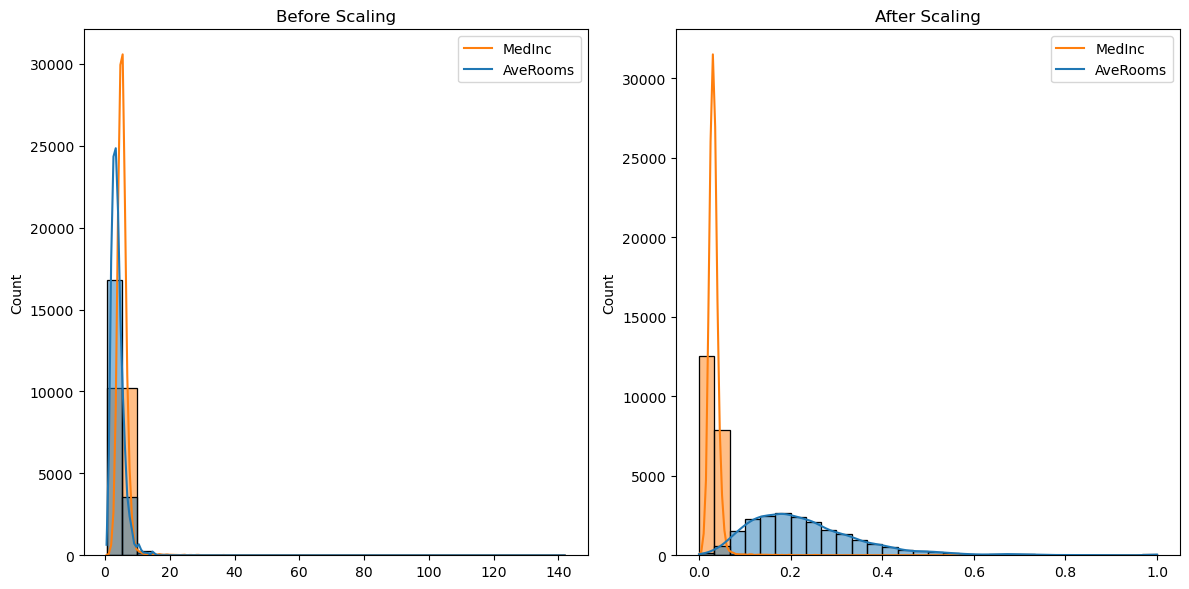

In [17]:
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load the California Housing dataset
california = fetch_california_housing()
df = pd.DataFrame(california.data, columns=california.feature_names)

# Focus on two columns: 'MedInc' and 'AveRooms'
columns_to_scale = ['MedInc', 'AveRooms']
data_to_scale = df[columns_to_scale]

# Before Scaling
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(data_to_scale, kde=True, bins=30)
plt.title('Before Scaling')
plt.legend(labels=['MedInc', 'AveRooms'])

# Apply Min-Max Scaling
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data_to_scale)
scaled_df = pd.DataFrame(scaled_data, columns=columns_to_scale)

# After Scaling
plt.subplot(1, 2, 2)
sns.histplot(scaled_df, kde=True, bins=30)
plt.title('After Scaling')
plt.legend(labels=['MedInc', 'AveRooms'])
plt.tight_layout()
plt.show()

## **Standardizing the Wine Quality Dataset**
**Why Standardization?**
- The Wine Quality dataset contains features like alcohol and sulphates, which are measured in different units. Standardization ensures that all features have a mean of 0 and a standard deviation of 1.

**How?**
We’ll use StandardScaler to standardize the data.

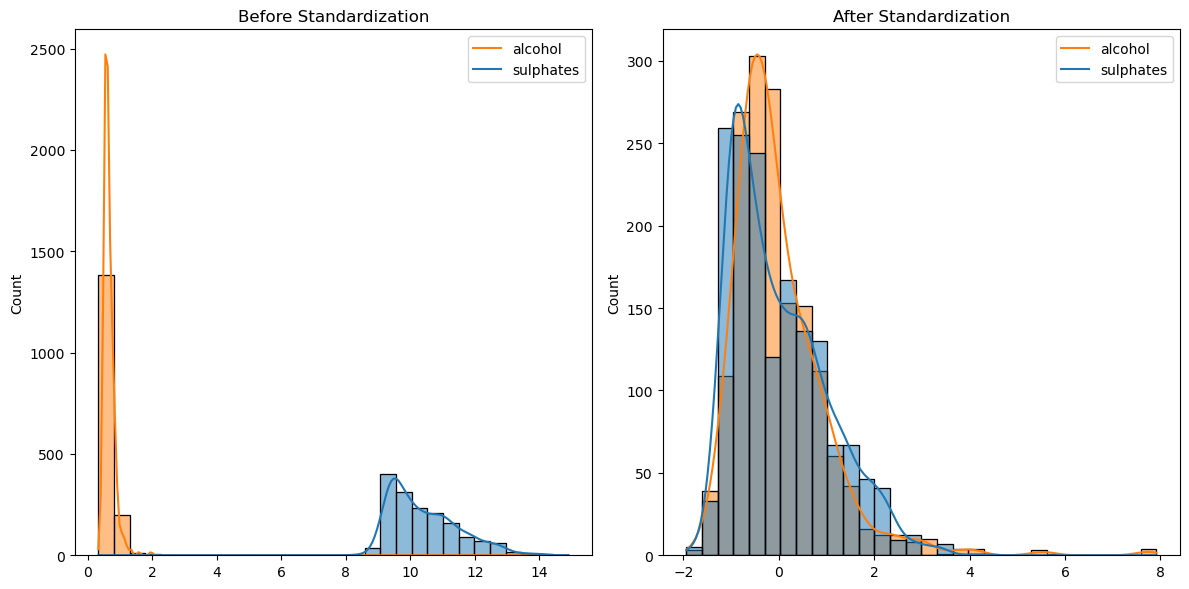

In [19]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Wine Quality dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
df = pd.read_csv(url, delimiter=';')

# Focus on two columns: 'alcohol' and 'sulphates'
columns_to_standardize = ['alcohol', 'sulphates']
data_to_standardize = df[columns_to_standardize]

# Before Standardization
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(data_to_standardize, kde=True, bins=30)
plt.title('Before Standardization')
plt.legend(labels=['alcohol', 'sulphates'])

# Apply Standardization
scaler = StandardScaler()
standardized_data = scaler.fit_transform(data_to_standardize)
standardized_df = pd.DataFrame(standardized_data, columns=columns_to_standardize)

# After Standardization
plt.subplot(1, 2, 2)
sns.histplot(standardized_df, kde=True, bins=30)
plt.title('After Standardization')
plt.legend(labels=['alcohol', 'sulphates'])
plt.tight_layout()
plt.show()

## **Standardizing the Diabetes Dataset**
**Why Standardization?**

- The Diabetes dataset contains features like BMI and BP (blood pressure), which are measured in different units. Standardization ensures that all features contribute equally to the model.

**How?**
We’ll use StandardScaler to standardize the data.

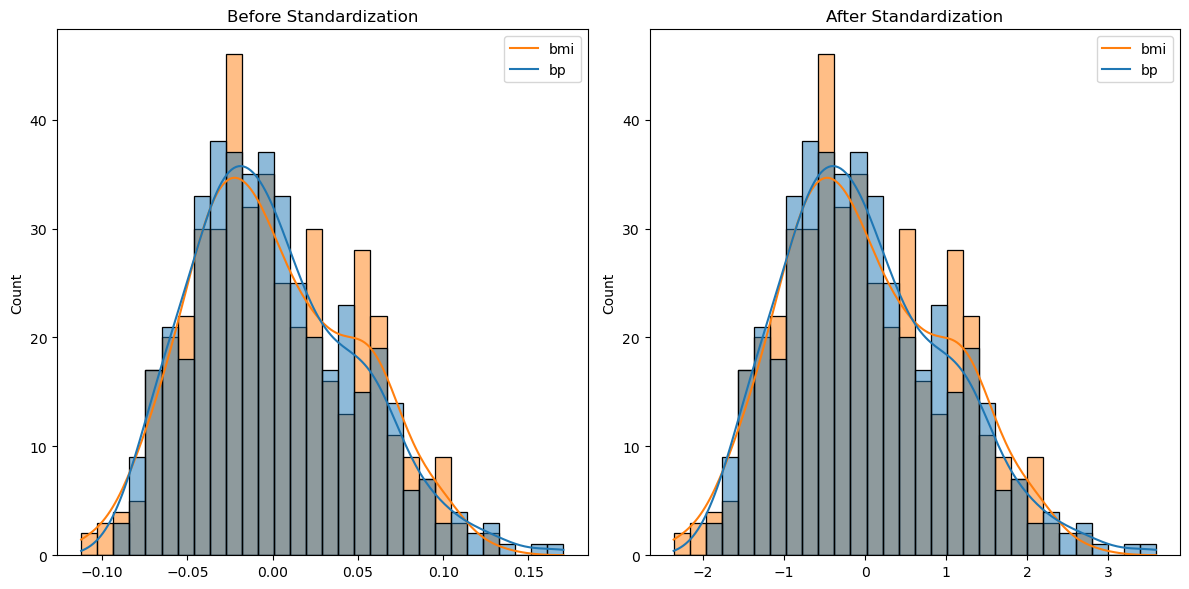

In [26]:
from sklearn.datasets import load_diabetes

# Load the Diabetes dataset
diabetes = load_diabetes()
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)

# Focus on two columns: 'bmi' and 'bp'
columns_to_standardize = ['bmi', 'bp']
data_to_standardize = df[columns_to_standardize]

# Before Standardization
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(data_to_standardize, kde=True, bins=30)
plt.title('Before Standardization')
plt.legend(labels=['bmi', 'bp'])

# Apply Standardization
scaler = StandardScaler()
standardized_data = scaler.fit_transform(data_to_standardize)
standardized_df = pd.DataFrame(standardized_data, columns=columns_to_standardize)

# After Standardization
plt.subplot(1, 2, 2)
sns.histplot(standardized_df, kde=True, bins=30)
plt.title('After Standardization')
plt.legend(labels=['bmi', 'bp'])
plt.tight_layout()
plt.show()

---

## **Exercises for Students**
- Scaling Exercise: Use the load_boston() dataset and apply Min-Max Scaling to the features. Visualize the data before and after scaling using boxplots.


- Standardization Exercise: Use the load_digits() dataset and apply StandardScaler to the features. Visualize the data before and after standardization using boxplots.

- Combined Exercise: Choose a dataset with features of different scales and units. Apply both scaling and standardization to the dataset. Compare the results and discuss which method is more appropriate for the dataset.
---


## **Key Takeaways**
- Scaling transforms data into a specific range (e.g., [0, 1]), which is useful when features have different units or scales.

- Standardization transforms data to have a mean of 0 and a standard deviation of 1, which is useful for algorithms that assume centered data.

- Both techniques ensure that all features contribute equally to the model, improving the performance of machine learning algorithms.
-  [Chk Difference Between SCALING AND STANDARDISATION IN AWESOME WAY](https://www.linkedin.com/posts/ibrahimqasmi313_datascience-machinelearning-normalizationvsstandardization-activity-7238799553548693504-L-pI?utm_source=share&utm_medium=member_desktop)
